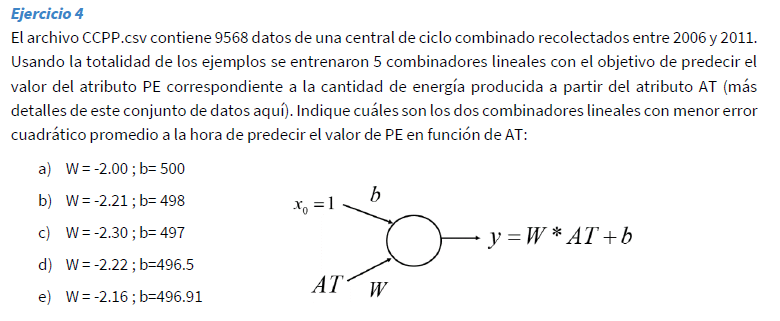

In [25]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [26]:
import pandas as pd      
import chardet


nombre_archivo = DATOS_DIR + 'CCPP.csv' 

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

display(df)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [27]:
import numpy as np

#Primero seleccionamos los valores x e y de la neurona lineal
X = np.array(df["AT"])
Y = np.array(df["PE"])

#Al hacer reshape, modificamos el vector de AT a que sean las filas necesarias y 1 columna
X = X.reshape(-1,1)
print(X)
print(Y)

[[14.96]
 [25.18]
 [ 5.11]
 ...
 [31.32]
 [24.48]
 [21.6 ]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


KeyboardInterrupt: 

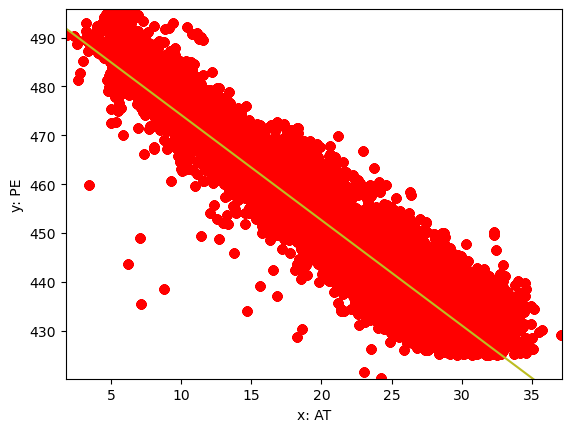

In [28]:
from ClassNeuronaLineal import NeuronaLineal

modelo = NeuronaLineal(alpha=0.0001, n_iter=50, cotaE=0.001, draw=1, title=['x: AT', 'y: PE'])
modelo.fit(X,Y)

In [23]:
# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_)
print('  b =', modelo.b_)

Pesos de la Neurona:
  w = [-2.15654558]
  b = 495.78666471712756


In [29]:
AT = df['AT'].values
PE = df['PE'].values

def calcular_ecm(W, b, AT, PE):
    predicciones = W * AT + b  # Fórmula para predecir PE
    ecm = np.mean((PE - predicciones) ** 2)  # Calcular el error cuadrático medio
    return ecm

print(calcular_ecm(-2, 500, AT, PE))

print(calcular_ecm(-2.21, 498, AT, PE))

print(calcular_ecm(-2.3, 497, AT, PE))

print(calcular_ecm(-2.22, 496.5, AT, PE))

print(calcular_ecm(-2.16, 496.91, AT, PE))

71.1625547554348
29.55712944886288
36.91941198244145
31.785616074548507
29.44848719225753


b y e son los de menor ecm